### Retriving the BPCL stock data from data.nasdaq.com

In [1]:
# Installing the required packages for data retrieval

! pip install Quandl
! pip install python-decouple
! pip install config

Importing the config function from the decouple module to access environment variables
and assigning the value of the environment variable 'NASDAQ_API' to the NASDAQ_API variable


In [2]:
from decouple import config
NASDAQ_API = config('NASDAQ_API')

In [3]:
# Code for retrieving BPCL stock data 
BPCL = 'BSE/BOM500547'

In [4]:
# Importing necessary modules for date handling and financial data retrieval
from datetime import datetime
from dateutil.relativedelta import relativedelta
import quandl

# Getting the current date and defining a start date 25 years ago
CURRENT_DATE = datetime.now()
START_DATE = CURRENT_DATE - relativedelta(years=25)

# Formatting start and current dates to match the format expected by quandl
START_DATE = datetime.strftime(START_DATE, '%Y-%m-%d')
CURRENT_DATE = datetime.strftime(CURRENT_DATE, '%Y-%m-%d')

# Returning the formatted start and current dates
START_DATE , CURRENT_DATE

('1999-05-13', '2024-05-13')

#### Quandl 
It is a platform that provides access to millions of financial, economic, and alternative datasets. It aggregates data from various sources including stock exchanges, central banks, and governments, making it a comprehensive resource for quantitative analysis. Quandl offers data in a variety of formats, including CSV, JSON, and XML, and provides APIs for easy integration into analytical tools and programming languages like Python and R. It is widely used by financial analysts, researchers, and data scientists for tasks such as market analysis, backtesting trading strategies, and economic research.

Setting the Quandl API key to access financial data and retrieving data for a specific stock (BPCL) using the provided start and end dates, collapsing the data to daily frequency, and ordering it in ascending order


In [5]:
# Storing the stock data into the dataframe

quandl.ApiConfig.api_key = NASDAQ_API
data = quandl.get(BPCL, 
                start_date=START_DATE, 
                end_date=CURRENT_DATE, 
                collapse='daily', 
                order='asc'
                )

data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1999-05-13,197.0,211.65,197.0,210.90,208.815666,495189.0,1707.0,103403221.0,NaN,NaN,14.65,13.90
1999-05-24,257.0,262.80,241.0,252.50,252.151568,147571.0,887.0,37210259.0,NaN,NaN,21.80,-4.50
1999-05-25,250.0,267.40,248.0,250.20,255.256685,192372.0,742.0,49104239.0,NaN,NaN,19.40,0.20
1999-06-07,259.4,265.00,253.0,258.50,259.046192,141323.0,678.0,36609185.0,NaN,NaN,12.00,-0.90
1999-06-08,255.5,259.50,250.0,253.95,256.324731,179450.0,779.0,45997473.0,NaN,NaN,9.50,-1.55


### Anaylsing the data

In [6]:
# Displaying the shape of the 'data' DataFrame, showing the number of rows and columns

data.shape

(4096, 12)

In [7]:
# Generating descriptive statistics summarizing the central tendency, dispersion, and shape of the data

data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4.096000e+03,4096.000000,4.096000e+03,3.775000e+03,3775.000000,4096.000000,4096.000000
mean,443.351843,450.171033,435.630505,442.399060,442.944661,2.482309e+05,3706.476318,9.978524e+07,9.208677e+04,34.294707,14.546680,-0.939917
std,172.927166,174.692769,170.990983,172.699809,172.972136,3.782431e+05,4011.949495,1.457049e+08,1.700941e+05,18.330683,9.192807,9.876665
min,16.250000,16.250000,16.250000,16.250000,16.250000,1.000000e+00,1.000000,1.700000e+01,1.000000e+00,1.390000,0.000000,-56.450000
25%,339.700000,345.000000,334.000000,339.437500,339.600000,7.423550e+04,1422.750000,3.208701e+07,1.975100e+04,20.280000,8.400000,-6.200000
50%,390.925000,396.750000,383.350000,389.775000,389.790000,1.415410e+05,2585.000000,6.260937e+07,4.241500e+04,30.450000,12.400000,-1.025000
75%,518.125000,526.050000,507.700000,516.362500,516.718691,2.849835e+05,4635.750000,1.159751e+08,9.588300e+04,44.500000,18.050000,3.950000
max,1138.700000,1152.450000,1118.250000,1132.600000,1136.020000,1.063845e+07,59916.000000,4.730941e+09,3.652796e+06,100.000000,103.000000,66.350000


In [8]:
# Counting the number of non-null values in each column of the DataFrame 'data'

data.count()

Open                         4096
High                         4096
Low                          4096
Close                        4096
WAP                          4096
No. of Shares                4096
No. of Trades                4096
Total Turnover               4096
Deliverable Quantity         3775
% Deli. Qty to Traded Qty    3775
Spread H-L                   4096
Spread C-O                   4096
dtype: int64

In [9]:
# Calculating the number of missing values in each column of the DataFrame 'data'

data.isnull().sum()

Open                           0
High                           0
Low                            0
Close                          0
WAP                            0
No. of Shares                  0
No. of Trades                  0
Total Turnover                 0
Deliverable Quantity         321
% Deli. Qty to Traded Qty    321
Spread H-L                     0
Spread C-O                     0
dtype: int64

The columns "Deliverable Quantity" and "% Deli. Qty to Traded Qty" have 322 missing values each.

### Plot the raw stock prices over time.

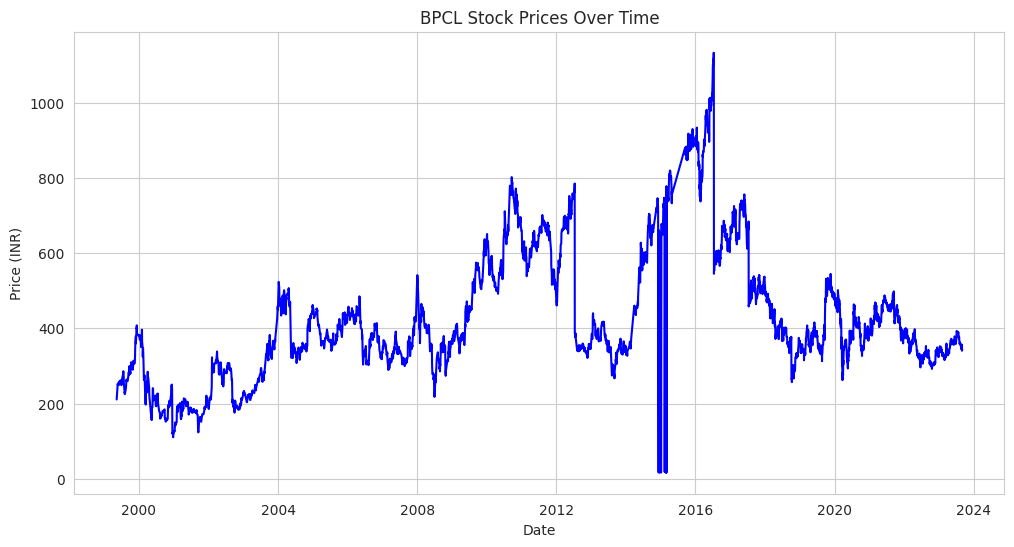

In [10]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set_style("whitegrid")

# Plotting the raw stock prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data['Close'], color='blue')
plt.title('BPCL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()


### Correct the stock prices for any splits and consolidations that have occurred.

The most common stock splits are those that divide the existing shares into smaller fractions, such as 1/2, 1/3, or 2/3. It also implies that stock splits larger than 67% (meaning each existing share is split into more than two shares) are less common and may not be practical for companies to undertake.

1. **Most Common Stock Splits (1/2, 1/3, 2/3)**:
    - A 1/2 split means each existing share is split into two shares. For example, if you had 100 shares before the split, you would have 200 shares after the split.
    - A 1/3 split means each existing share is split into three shares. For instance, if you had 90 shares before the split, you would have 270 shares after the split.
    - A 2/3 split means each existing share is split into three shares, but two of the original shares are split into two of the new shares, and one original share is split into one new share. For example, if you had 90 shares before the split, you would have 180 shares after the split.
    - These splits maintain a balance between increasing the number of shares and reducing the price per share, making them more common and feasible for companies to implement.

2. **Exclusion of Splits Larger than 67%**:
    - A split larger than 67% would mean each existing share is divided into more than two shares. For example, a 3/1 split would turn each share into three shares, and a 4/1 split would turn each share into four shares.
    - Splits larger than 67% significantly increase the number of outstanding shares while reducing the price per share. This can have several implications:
        - **Liquidity Concerns**: With a large increase in the number of shares outstanding, the liquidity of the stock could be impacted. It might become more difficult for investors to buy or sell large quantities of the stock without significantly affecting the price.
        - **Perception of the Company**: Companies that implement such large splits may be perceived as desperate to increase their stock price artificially, which could raise concerns about their financial health or future prospects.
        - **Investor Confidence**: Large stock splits might indicate volatility or instability, which can undermine investor confidence in the company.
    - Therefore, such large splits are less common and may not be practical or advisable for most companies to undertake. They are often excluded from discussions about common stock splits.

In [11]:
# Importing warnings to remove warnings from the display
import warnings
warnings.filterwarnings('ignore')

# Calculate the percentage change of each element in the DataFrame 'data' relative to its previous element
data1 = data.pct_change()

# Identify potential splits and consolidations
potential_changes = data1[abs(data1['Close']) > 0.30]
changes = potential_changes

# Refine the selection to consider potential splits and consolidations
potential_changes = potential_changes[abs(potential_changes['Close']) < 0.67]

# Further refine the selection by considering trading volume
potential_changes = potential_changes[(abs(potential_changes['Close']) < 0.67) & 
                                      (abs(potential_changes['No. of Trades']) < 0.40)]

# Display the potential splits and consolidations
print("Potential Splits and Consolidations:")
potential_changes


Potential Splits and Consolidations:


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


In [12]:
import numpy as np

# creating a Splits and Consolidation column with null values
data['Splits'] = np.nan

data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Splits
Date,,,,,,,,,,,,,
1999-05-13,197.0,211.65,197.0,210.90,208.815666,495189.0,1707.0,103403221.0,NaN,NaN,14.65,13.90,NaN
1999-05-24,257.0,262.80,241.0,252.50,252.151568,147571.0,887.0,37210259.0,NaN,NaN,21.80,-4.50,NaN
1999-05-25,250.0,267.40,248.0,250.20,255.256685,192372.0,742.0,49104239.0,NaN,NaN,19.40,0.20,NaN
1999-06-07,259.4,265.00,253.0,258.50,259.046192,141323.0,678.0,36609185.0,NaN,NaN,12.00,-0.90,NaN
1999-06-08,255.5,259.50,250.0,253.95,256.324731,179450.0,779.0,45997473.0,NaN,NaN,9.50,-1.55,NaN


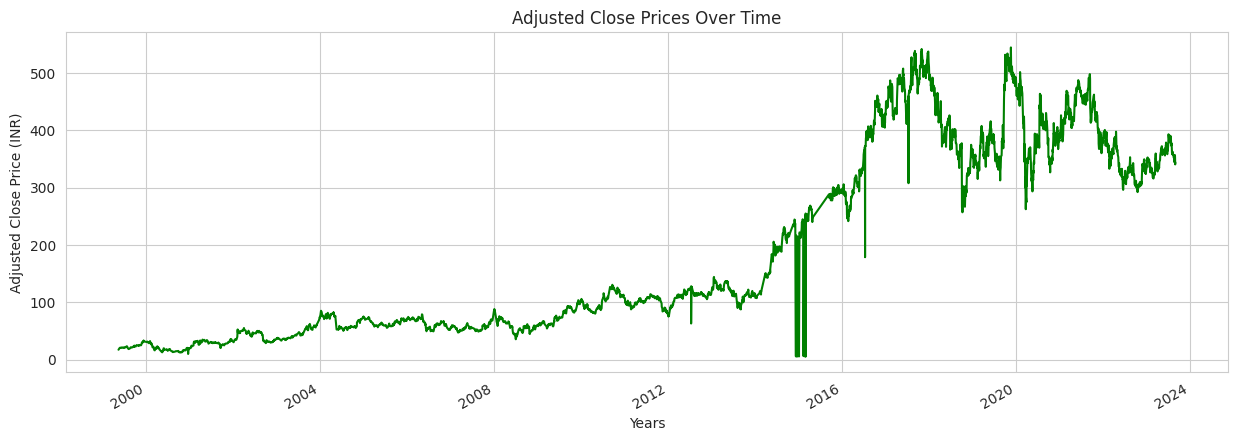

In [13]:
# Initialize cumulative multiple
cumulative_multiple = 1

# Calculate cumulative multiple for splits/consolidations
for date in potential_changes.index[::-1]:
    cumulative_multiple *= (1 - abs(potential_changes.loc[str(date), 'WAP']))
    data.loc[str(date), 'Splits'] = cumulative_multiple

# Fill missing values and replace NaNs
data['Splits'] = data['Splits'].bfill()
data['Splits'].fillna(1, inplace=True)

# Calculate adjusted close prices
data['Adjusted'] = data['Close'] * data['Splits']

# Plot adjusted close prices
data['Adjusted'].plot(figsize=[15, 5], color='Green')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Adjusted Close Price (INR)')
plt.title('Adjusted Close Prices Over Time')
plt.show()


Identify incorrect inputs by calculating the percentage change of 'Close' prices for rows in 'data' corresponding to dates where changes were not recorded in 'potential_changes'and checking if the percentage change is less than 0 (indicating a decrease)

In [14]:
# Identify rows with dates not in 'potential_changes'
missing_dates_index = ~data.index.isin(potential_changes.index)
missing_dates_data = data[missing_dates_index]

# Calculate percentage change of 'Close' prices for missing dates
close_pct_change = missing_dates_data['Close'].pct_change()

# Check if percentage change is negative
error = close_pct_change < 0

# Filter error based on 'Close' price decrease
error = missing_dates_data[error]

# Output DataFrame containing dates with 'Close' price decrease
error


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Splits,Adjusted
Date,,,,,,,,,,,,,,
1999-05-25,250.00,267.4,248.00,250.20,255.256685,192372.0,742.0,49104239.0,NaN,NaN,19.40,0.20,0.081453,20.379446
1999-06-08,255.50,259.5,250.00,253.95,256.324731,179450.0,779.0,45997473.0,NaN,NaN,9.50,-1.55,0.081453,20.684894
1999-06-10,257.95,258.0,253.10,253.25,254.901863,59356.0,196.0,15129955.0,NaN,NaN,4.90,-4.70,0.081453,20.627877
1999-06-11,251.35,253.0,248.35,250.00,250.323804,93294.0,427.0,23353709.0,NaN,NaN,4.65,-1.35,0.081453,20.363156
1999-07-01,258.60,258.6,252.10,253.00,253.726877,88180.0,209.0,22373636.0,NaN,NaN,6.50,-5.60,0.081453,20.607514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-22,351.70,354.6,346.55,346.90,349.930000,498815.0,2508.0,174552231.0,450187.0,90.25,8.05,-4.80,1.000000,346.900000
2023-08-23,347.00,349.0,344.10,344.70,345.130000,1393655.0,5441.0,480995217.0,1298868.0,93.20,4.90,-2.30,1.000000,344.700000
2023-08-25,351.10,354.1,349.35,350.20,352.120000,123084.0,2324.0,43340090.0,36373.0,29.55,4.75,-0.90,1.000000,350.200000


<Axes: xlabel='Date'>

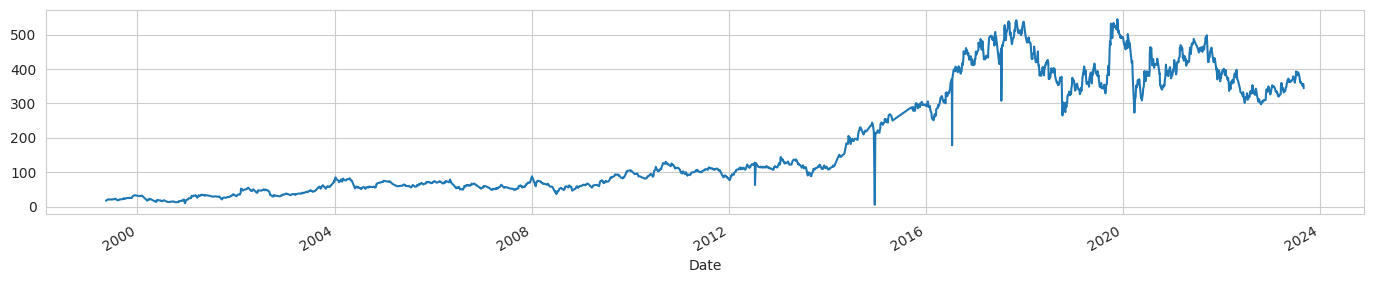

In [15]:
# Remove rows with dates having 'Close' price decrease from original data
data.drop(index=error.index, inplace=True)

# Plot the adjusted close prices after removing error
data['Adjusted'].plot(kind='line', figsize=[17, 3])


In [16]:
from matplotlib import dates as dt

# Define a function to annotate stock splits
def annotation(index):
    # Annotate the 'Split' event at the specified index
    plt.annotate('Split', 
                 # Position of the annotation
                 (dt.date2num(potential_changes.index[index]), data.loc[potential_changes.index,'Adjusted'][index]), 
                 # Offset for the text position
                 xytext=(18, 10), 
                 # Text coordinates
                 textcoords='offset points', 
                 # Arrow properties
                 arrowprops=dict(arrowstyle='-|>'))


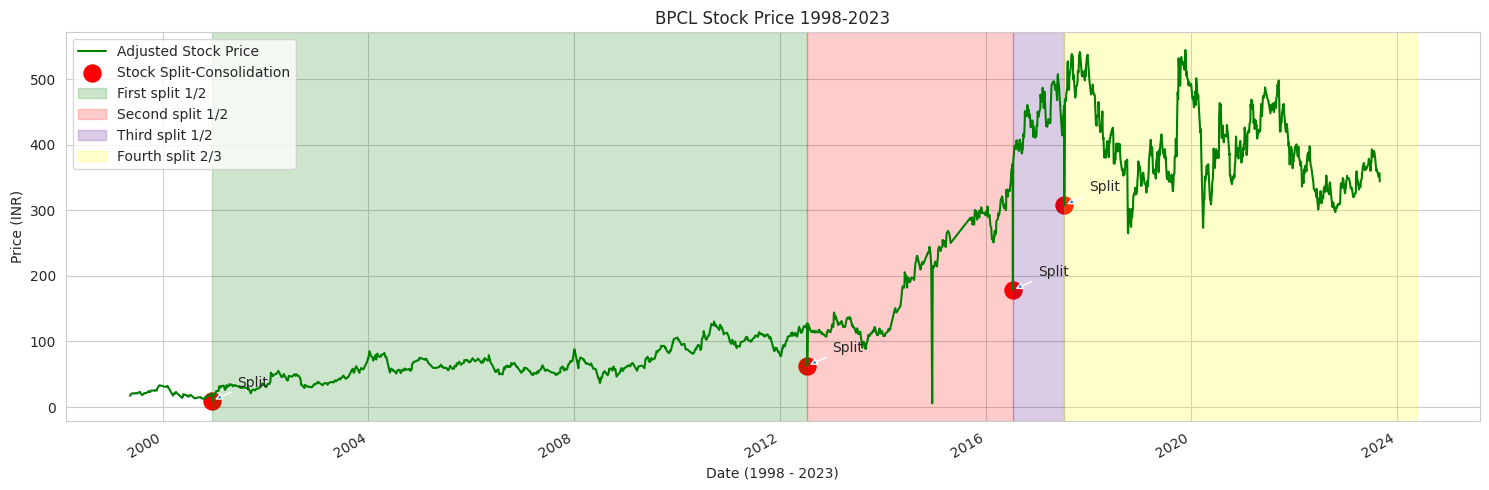

In [20]:
# Plot the adjusted close prices with potential stock splits
data['Adjusted'].plot(kind='line', figsize=[15, 5], color='Green', label='Adjusted Stock Price')

# Scatter plot for split/consolidation events
plt.scatter(x=potential_changes.index, y=data.loc[potential_changes.index, 'Adjusted'], s=150, c='Red', label='Stock Split-Consolidation')

# Set plot title and axis labels
plt.title('BPCL Stock Price 1998-2023')
plt.xlabel('Date (1998 - 2023)')
plt.ylabel('Price (INR)')

# Colored background spans for split/consolidation periods
plt.axvspan(potential_changes.index[0], potential_changes.index[1], alpha=0.2, color="green", label='First split 1/2')
plt.axvspan(potential_changes.index[1], potential_changes.index[2], alpha=0.2, color="red", label='Second split 1/2')
plt.axvspan(potential_changes.index[2], potential_changes.index[3], alpha=0.2, color="indigo", label='Third split 1/2')
plt.axvspan(potential_changes.index[3], datetime.now(), alpha=0.2, color="yellow", label='Fourth split 2/3')

# Annotate split events
for index in range(len(potential_changes)):
    annotation(index)

# Display legend and adjust layout
plt.legend()
plt.tight_layout()
plt.savefig('BPCL_Stock_Price.png')

plt.show()


In [19]:
plt.savefig('BPCL_Stock_Price.png')


<Figure size 640x480 with 0 Axes>

### Show the dates for any splits and consolidations that have occurred.

In [18]:
potential_changes

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


**The Splits Dates are:**
- 18-12-2000
- 13-07-2012
- 13-07-2016
- 13-07-2017